**Exercise 4 - Random Forest**

---

In this exercise you will implement the random forest algorithm. A random forest is a ensemble method which combines N random trees to classify an input set of points. In this assignment you will start implementing a decision tree, then modify it to be a random tree and use it on the random forest algorithm.

In [1]:
# import libraries used during this exercise
# it may be necessary to uncomment the two following pip commands
#!pip3 install pandas
#!pip3 install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# the core.py file contains the plottings and other pre-defined functions
from mlrcv.core import *
%matplotlib notebook
%matplotlib inline

In this exercise we will use the same toy dataset from exercise 3, with $x_1$, $x_2$ and the $y$ (*class*) values, where the point ($x_1$,$x_2$) is the observed data that should be used to predict the $y$ class value. The difference is this case relies on the number of classes, which now divides the data in 4 classes.

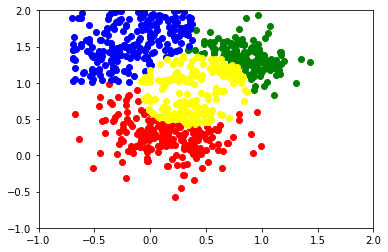

In [2]:
# Dataset read
df = pd.read_csv('data/random_forest.csv')
x = df.drop(columns=['class']).values
y = df['class'].values
num_class = 4
plot_model(x, y, None)

In [3]:
df

,x,y,class
0,0.658000,1.570000,1.0
1,0.676000,1.185000,3.0
2,-0.084000,0.343000,0.0
3,1.019000,0.956000,1.0
4,0.853000,0.901000,3.0
...,...,...,...
745,0.109643,1.618177,2.0
746,-0.367985,1.426743,2.0
747,-0.106413,1.972236,2.0
748,0.163227,1.023377,3.0


In [4]:
# already implemented this time :)
x_train, y_train, x_val, y_val = split_data(x, y)

**4.1 Decision Tree \[5\]**

---

Given the loaded dataset $x_1,x_2$ and $y$ class label, you should implement the class functions in the *mlrcv/decision_tree.py* file to build a decision tree that will split the data maximizing the information gain at each split. The following function should be implemented:

**DecisionTree class:**
- *fit*: split the training data over the tree nodes and leaves
- *predict_y*: predict $y$ values from input $x$

**TreeNode class:**
- *infer_node*: predict the  $y$ class, iter over nodes and when arrive at the leaf return the class classified on this node
- *split_node*: define the splits values and crete the left and right (binary tree) child nodes
- *attr_gain*: receives an attribute values (column), divide it in splits and compute the information gain for each split (return the best split for that attribute)
- *information_gain*: compute the information gain given the current samples $y$ and the possible left and right divided samples $y_l$ and $y_r$
- *entropy*: calculate the entropy of a set of samples $y$


In [5]:
from mlrcv.decision_tree import *

d_tree = DecisionTree(max_degree=1, num_class=num_class)

In [9]:
d_tree.fit(x_train, y_train)
yy = d_tree.predict_y(y_train)

In [10]:
yy

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, No

In [7]:


print('acc: ', d_tree.eval(x_val, y_val))



acc:  0.0


In [8]:
plot_model(x_val, y_val, d_tree)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

With the current setup you should get a poor accuracy and on the plot you should see just one division between two colors. That's because we are building a tree with a the maximum degree (or depth) of 1, so the decision tree can only define two partitions on the space (split the values only once), leading to a poor division of the classes. You can change the *max_degree* attribute and take a look on the changes on the accuracy and on the plot data division.

**4.2 Random Tree \[1\]**

---

In this second task you should change your implemented decision tree to be a random tree. To do that you should implement the *RandomTree* and *RandomTreeNode* classes on the file *mlrcv/random_tree.py*. The structure is the same as the *DecisionTree*, the only difference is on the splits selection over each attribute, which, instead of calculate the information gain and select the split from the full splits set, you should caculate only for random subset of it.

(**Hint:** basically the only difference between the decision tree and random tree is on *attr_gain* function)

In [ ]:
from mlrcv.random_forest import *

r_tree = RandomTree(max_degree=1, num_class=num_class)
r_tree.fit(x_train, y_train)
print('acc: ', r_tree.eval(x_val, y_val))

plot_model(x_val, y_val, r_tree)

As in the decision tree, with *max_degree* equals 1 you should have again a poor performance, you can again change the *max_degree* and compare it with the *DecisionTree*. The difference from before is that, since now you select random splits, everytime you fit this model, it should lead to a different accuracy, and to a different data division on the plot.

**4.3 Random Forest \[4\]**

---

In this last task, finally you will be implementing the random forest. The idea of the random forest is to ensemble several random trees, and use the different random trees results to build a data distribution. As before, you should implement the *fit* and *predict_y* functions from *RandomForest* class, but also in this case you should implement the *random_tree_data* function, to add even more randomness to the model. This function uses a $\rho$ parameter between the interval $(0.,1.]$, which describes the subsamples size w.r.t. the training set size:
- *fit*: train the model
- *predict_y*: predict $y$ values from input $x$
- *random_tree_data*: given the input data $x$ and $y$, generates random subsamples of it for each random tree

In [ ]:
from mlrcv.random_forest import *

r_forest = RandomForest(max_degree=1, num_class=num_class, trees_num=10, random_rho=1.0)
r_forest.fit(x_train, y_train)
print('acc: ', r_forest.eval(x_val, y_val))

plot_model(x_val, y_val, r_forest)

As before, with *max_degree=1* the accuracy should be low. However, if you only change the *random_rho* and *trees _num* parameters you may notice already an improvement on the accuracy, and, most important, on the plot. The advantage of combining random trees is that, instead of having strict decision boundaries (as in decision and random trees), you now have more smoothier boundaries, which is the combination of the random trees boundaries, leading to a better generalization.

Play with the parameters and compare the *RandomForest* and the *DecisionTree* results. If you compare the *DecisionTree* and *RandomForest* using the same value for the *max_degree*, the *RandomForest* probably will have a higher performance and a better (smoothier) data division on the plots.